In [1]:
%run setup.ipynb

In [2]:
%matplotlib inline

In [3]:
callset = h5py.File('../ngs.sanger.ac.uk/production/ag1000g/phase1/AR3.1/haplotypes/specific_regions/PARA/2L_2358158_2431617.h5',
                    mode='r')
h5ls(callset)

/2L : <HDF5 group "/2L" (3 members)>
/2L/calldata : <HDF5 group "/2L/calldata" (1 members)>
/2L/calldata/genotype : <HDF5 dataset "genotype": shape (1967, 773, 2), type "|i1">
/2L/samples : <HDF5 dataset "samples": shape (773,), type "|S8">
/2L/variants : <HDF5 group "/2L/variants" (4 members)>
/2L/variants/ALT : <HDF5 dataset "ALT": shape (1967,), type "|S1">
/2L/variants/ID : <HDF5 dataset "ID": shape (1967,), type "|S8">
/2L/variants/POS : <HDF5 dataset "POS": shape (1967,), type "<i4">
/2L/variants/REF : <HDF5 dataset "REF": shape (1967,), type "|S1">


In [4]:
# subset to VGSC
region_vgsc = SeqFeature('2L', 2358158, 2431617)

In [5]:
g = allel.GenotypeArray(callset['2L/calldata/genotype'])
g

<GenotypeArray shape=(1967, 773, 2) dtype=int8>
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
1/1 0/1 1/1 1/1 0/1 ... 0/0 1/0 0/0 1/1 0/1
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0

In [6]:
h = g.to_haplotypes()
h

<HaplotypeArray shape=(1967, 1546) dtype=int8>
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
...
0 0 0 0 0 ... 0 0 0 0 0
1 1 0 1 1 ... 0 1 1 0 1
0 0 0 0 0 ... 0 0 0 0 0

In [7]:
pos = allel.SortedIndex(callset['2L/variants/POS'])
pos

0,1,2,3,4,...,1962,1963,1964,1965,1966
2353212,2353223,2353234,2353251,2353288,...,2436544,2436545,2436558,2436585,2436615


In [8]:
loc = pos.locate_range(region_vgsc.start, region_vgsc.end)
loc

slice(83, 1801, None)

In [9]:
h_vgsc = h[loc]
h_vgsc

<HaplotypeArray shape=(1718, 1546) dtype=int8>
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
...
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0

In [10]:
def fig_haplotypes_clustered(h,
                             distance_metric='hamming',
                             linkage_method='single',
                             fig=None,
                             color_threshold=0,
                             ):
    
    # check inputs
    h = allel.HaplotypeArray(h)
    
    # compute distances
    dist = scipy.spatial.distance.pdist(h.T, metric=distance_metric)
    if distance_metric in {'hamming', 'jaccard'}:
        # convert distance to number of SNPs, easier to interpret
        dist *= h.n_variants

    # compute hierarchical clustering
    clust = scipy.cluster.hierarchy.linkage(dist, method=linkage_method)
    # tree = scipy.cluster.hierarchy.to_tree(clust)

    # setup figure
    if fig is None:
        fig = plt.figure()
        
    # plot dendrogram
    ax = fig.add_subplot(111)
    sns.despine(ax=ax, offset=5, bottom=True, top=True)
    kwargs = dict(
        show_leaf_counts=False, 
        count_sort=True, 
        no_labels=True, 
        color_threshold=color_threshold, 
        above_threshold_color='k', 
    )    
    dend = scipy.cluster.hierarchy.dendrogram(clust, ax=ax, **kwargs)
    
    ax.set_ylim(bottom=-2)
    fig.tight_layout()
    

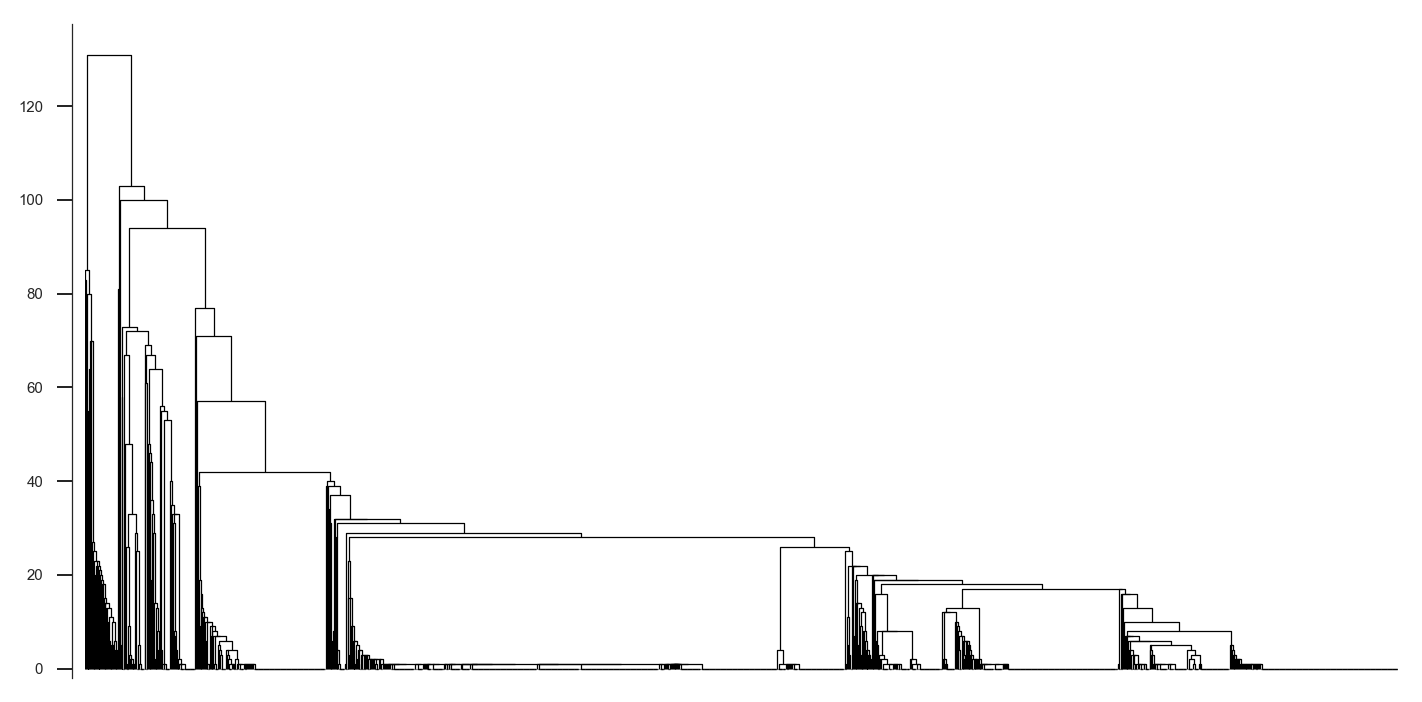

In [11]:
fig = plt.figure(figsize=(8, 4), dpi=180)
fig_haplotypes_clustered(h_vgsc, fig=fig)

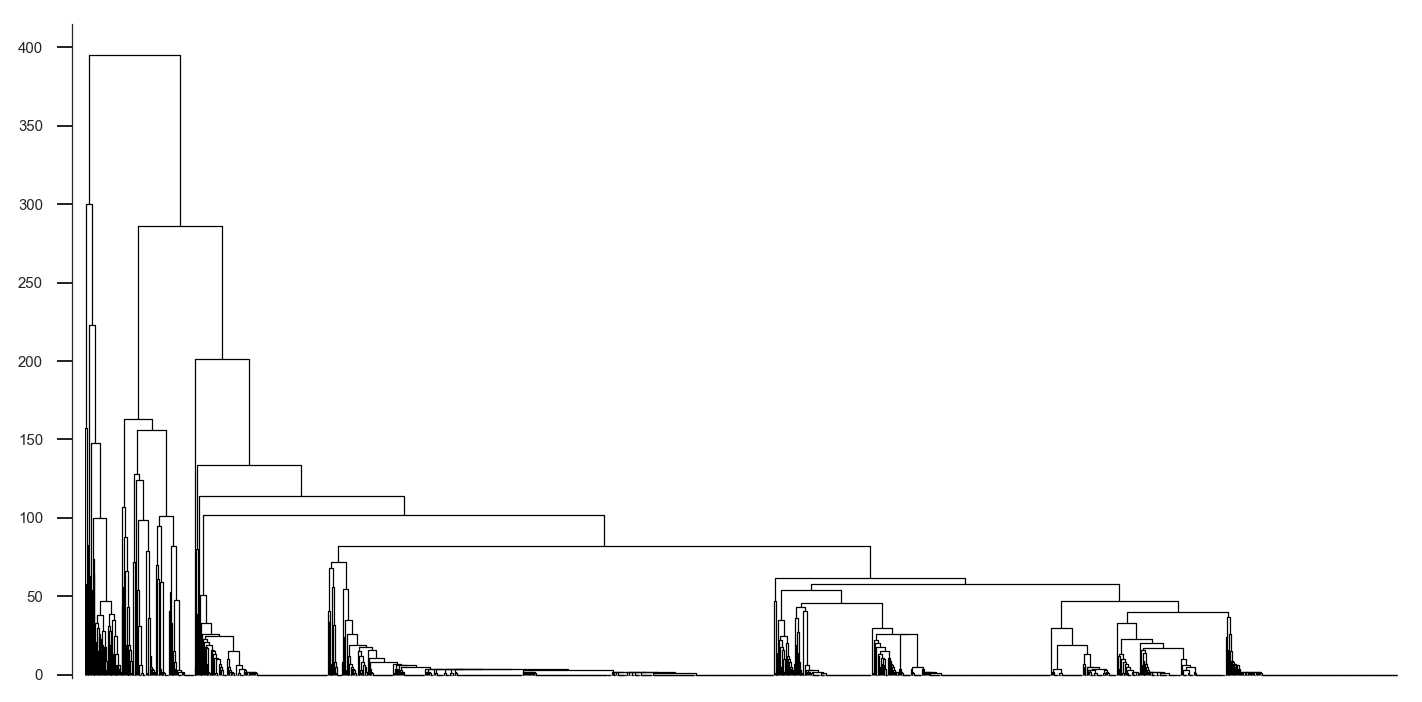

In [12]:
fig = plt.figure(figsize=(8, 4), dpi=180)
fig_haplotypes_clustered(h_vgsc, fig=fig, linkage_method='complete')

In [13]:
pos

0,1,2,3,4,...,1962,1963,1964,1965,1966
2353212,2353223,2353234,2353251,2353288,...,2436544,2436545,2436558,2436585,2436615


In [14]:
h

<HaplotypeArray shape=(1967, 1546) dtype=int8>
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
...
0 0 0 0 0 ... 0 0 0 0 0
1 1 0 1 1 ... 0 1 1 0 1
0 0 0 0 0 ... 0 0 0 0 0

In [15]:
pos_995S = 2422651
pos_995F = 2422652

In [16]:
pos.locate_key(pos_995S)

1613

In [17]:
loc_995S = h[pos.locate_key(pos_995S)] == 1
loc_995S.shape

(1546,)

In [18]:
loc_995F = h[pos.locate_key(pos_995F)] == 1
loc_995F.shape

(1546,)

In [19]:
h_vgsc_995F = h_vgsc.compress(loc_995F, axis=1)
h_vgsc_995F

<HaplotypeArray shape=(1718, 780) dtype=int8>
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
...
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0

In [20]:
h_vgsc_995S = h_vgsc.compress(loc_995S, axis=1)
h_vgsc_995S

<HaplotypeArray shape=(1718, 430) dtype=int8>
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
...
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0

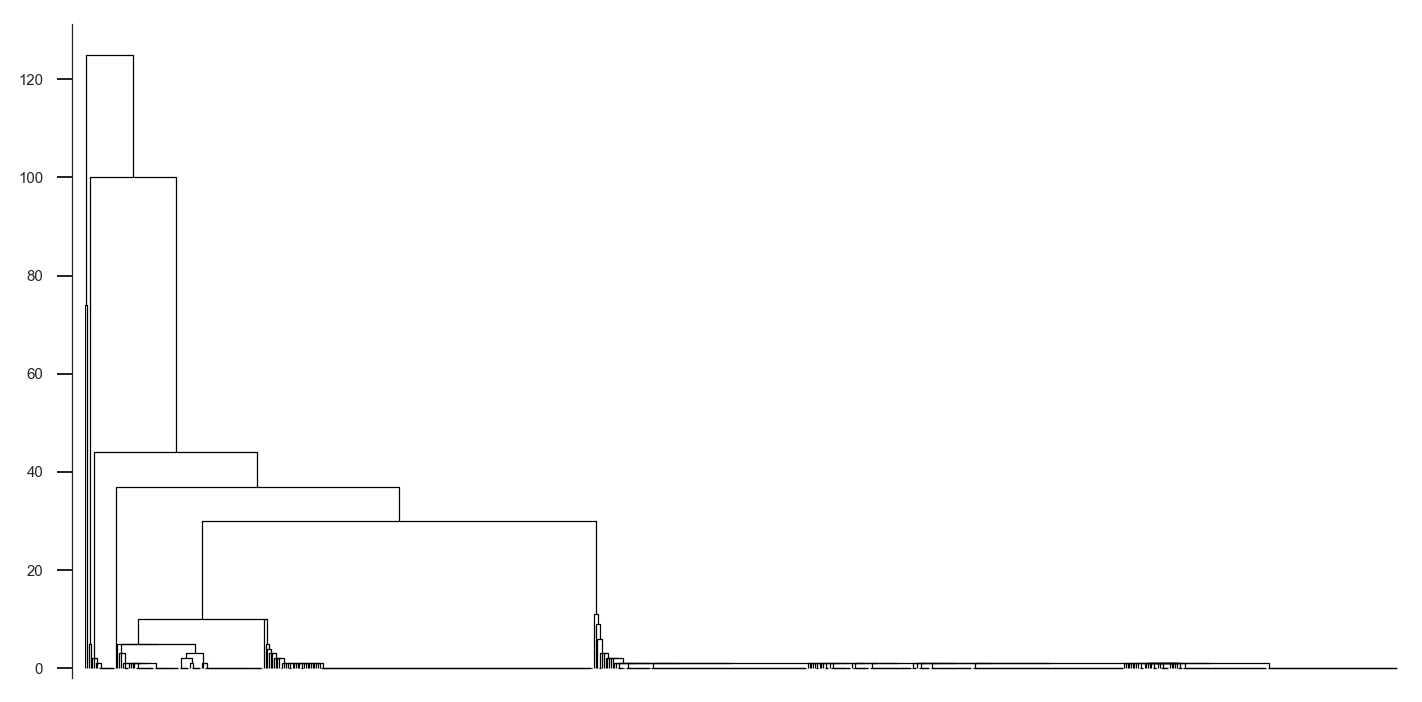

In [21]:
fig = plt.figure(figsize=(8, 4), dpi=180)
fig_haplotypes_clustered(h_vgsc_995F, fig=fig, linkage_method='single')

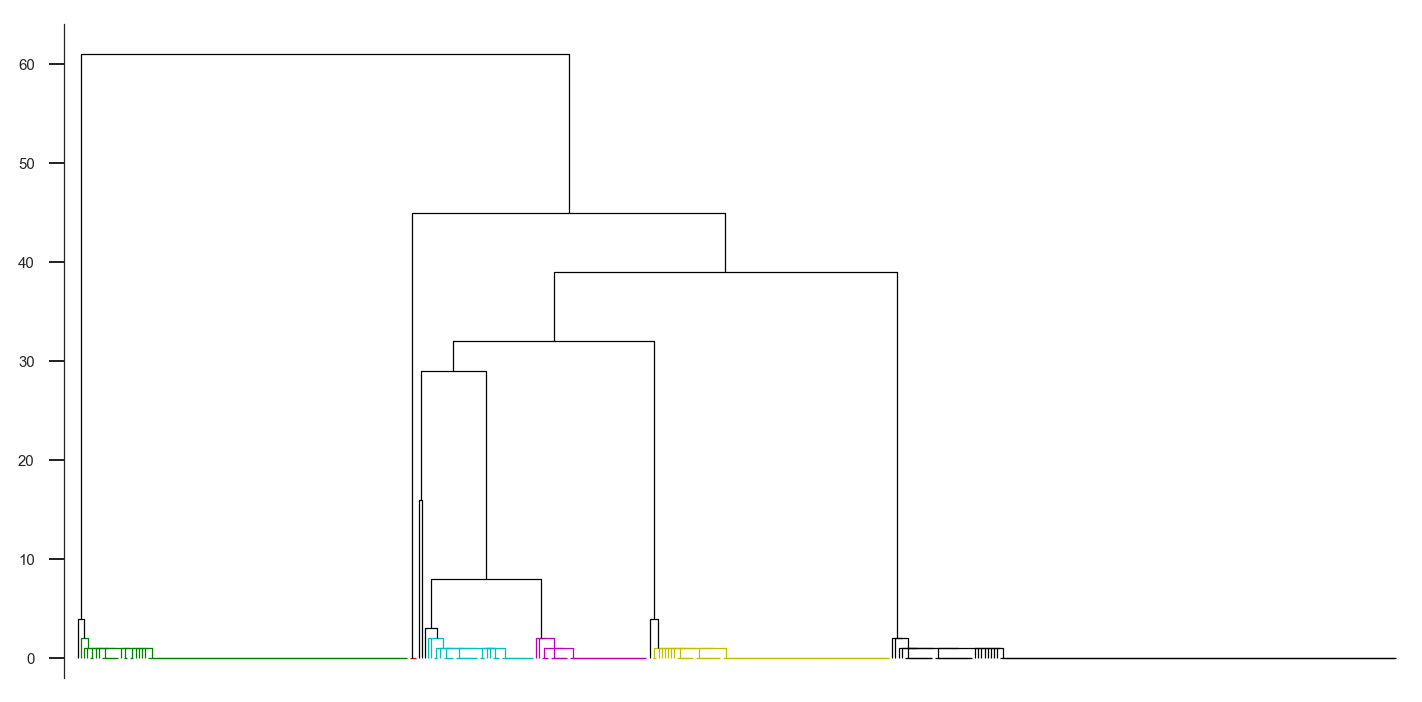

In [23]:
fig = plt.figure(figsize=(8, 4), dpi=180)
fig_haplotypes_clustered(h_vgsc_995S, fig=fig, linkage_method='single', color_threshold=3)

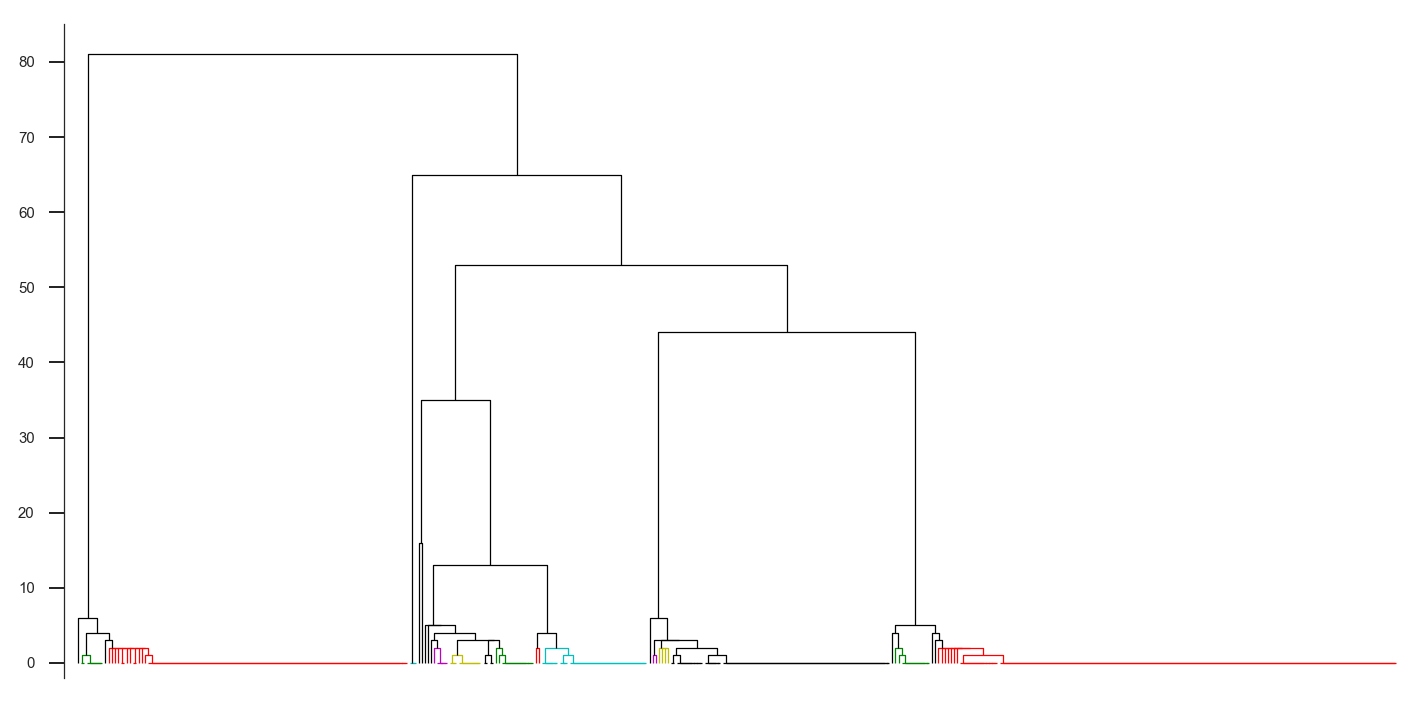

In [24]:
fig = plt.figure(figsize=(8, 4), dpi=180)
fig_haplotypes_clustered(h_vgsc_995S, fig=fig, linkage_method='complete', color_threshold=3)

In [25]:
def get_descendant(node, desc_id):
    if node.id == desc_id:
        return node
    if node.is_leaf():
        return None
    if node.left.id == desc_id:
        return node.left
    if node.right.id == desc_id:
        return node.right
    # search left
    l = get_descendant(node.left, desc_id)
    if l is not None:
        return l
    # search right
    r = get_descendant(node.right, desc_id)
    return r
    

def get_leaves(node):
    if node.is_leaf():
        return None
    leaves = list()
    if node.left.is_leaf():
        leaves.append(node.left.id)
    else:
        leaves.extend(get_leaves(node.left))
    if node.right.is_leaf():
        leaves.append(node.right.id)
    else:
        leaves.extend(get_leaves(node.right))
    return leaves

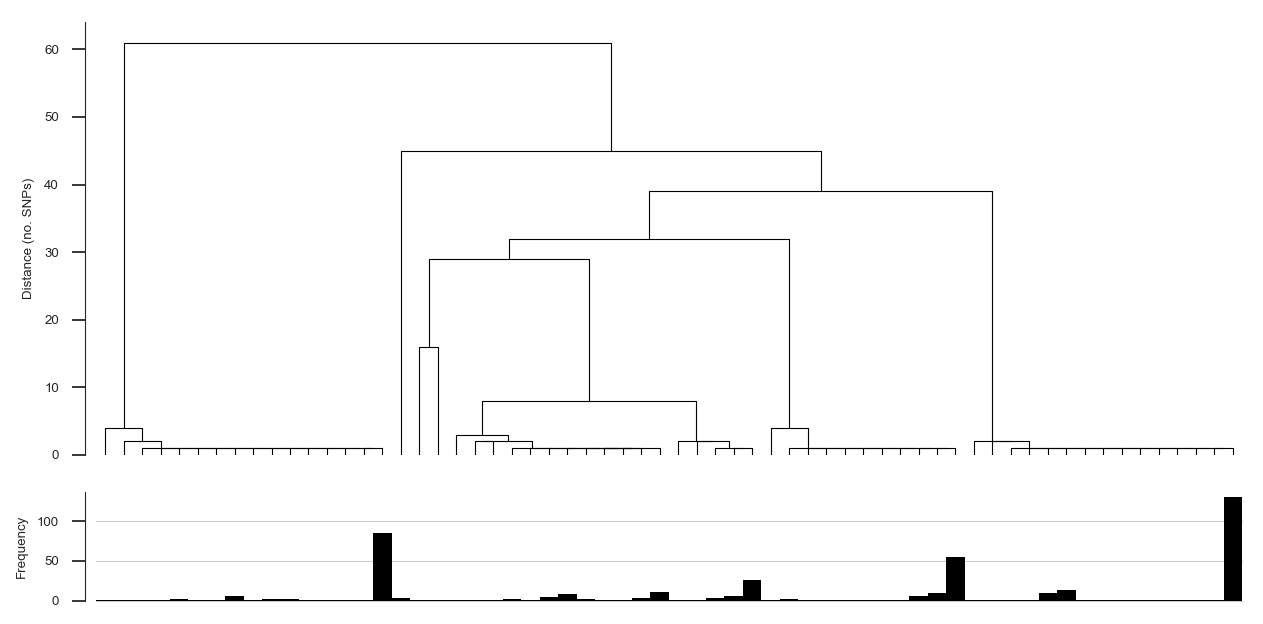

In [26]:
def fig_haplotypes_distinct_clustered(h,
                                      distance_metric='hamming',
                                      linkage_method='single',
                                      color_threshold=0,
                                      truncate_distance=0,
                                      height_ratios=[4, 1],
                                      fig=None):
    
    
    # check inputs
    h = allel.HaplotypeArray(h)

    # compute distance matrix
    dist = scipy.spatial.distance.pdist(h.T, metric=distance_metric)
    if distance_metric in {'hamming', 'jaccard'}:
        # convert distance to number of SNPs, easier to interpret
        dist *= h.n_variants

    # compute hierarchical clustering
    clust = scipy.cluster.hierarchy.linkage(dist, method=linkage_method)
    tree = scipy.cluster.hierarchy.to_tree(clust)
    max_dist = max(clust[:, 2])

    # find level to truncate dendrogram
    lastp = h.n_haplotypes - bisect.bisect_right(clust[:, 2], truncate_distance)

    # setup main figure
    if fig is None:
        fig = plt.figure()
    gs = plt.GridSpec(nrows=2, ncols=1, height_ratios=height_ratios)

    # make a dendrogram
    kwargs = dict(
        truncate_mode='lastp', 
        p=lastp,
        show_leaf_counts=False, 
        count_sort=True, 
        no_labels=True, 
        color_threshold=0, 
        above_threshold_color='k', 
    )    
    ax = fig.add_subplot(gs[0])
    sns.despine(ax=ax, offset=5, bottom=True, top=True)
    dend = scipy.cluster.hierarchy.dendrogram(clust, ax=ax, **kwargs)
    leaves = dend['leaves']
    ax.set_ylabel('Distance (no. SNPs)')
    ax.set_xticks([])
    
    # plot frequency bar
    ax = fig.add_subplot(gs[1])
    sns.despine(ax=ax, offset=5, bottom=True)
    left = np.arange(len(leaves))
    bottom = np.zeros(len(leaves))
    height = np.array([
        1 if l < h.n_haplotypes
        else len(get_leaves(get_descendant(tree, l)))
        for l in leaves
    ])
    ax.bar(left, height, width=1, lw=0, color='k', align='edge')
    ax.set_xlim(0, len(leaves))
    ax.set_xticks([])
    ax.set_ylabel('Frequency')
    ax.grid(axis='y', lw=.5, color='#cccccc')

    
    fig.tight_layout()

    
fig = plt.figure(figsize=(8, 4), dpi=160)
fig_haplotypes_distinct_clustered(h_vgsc_995S, fig=fig)

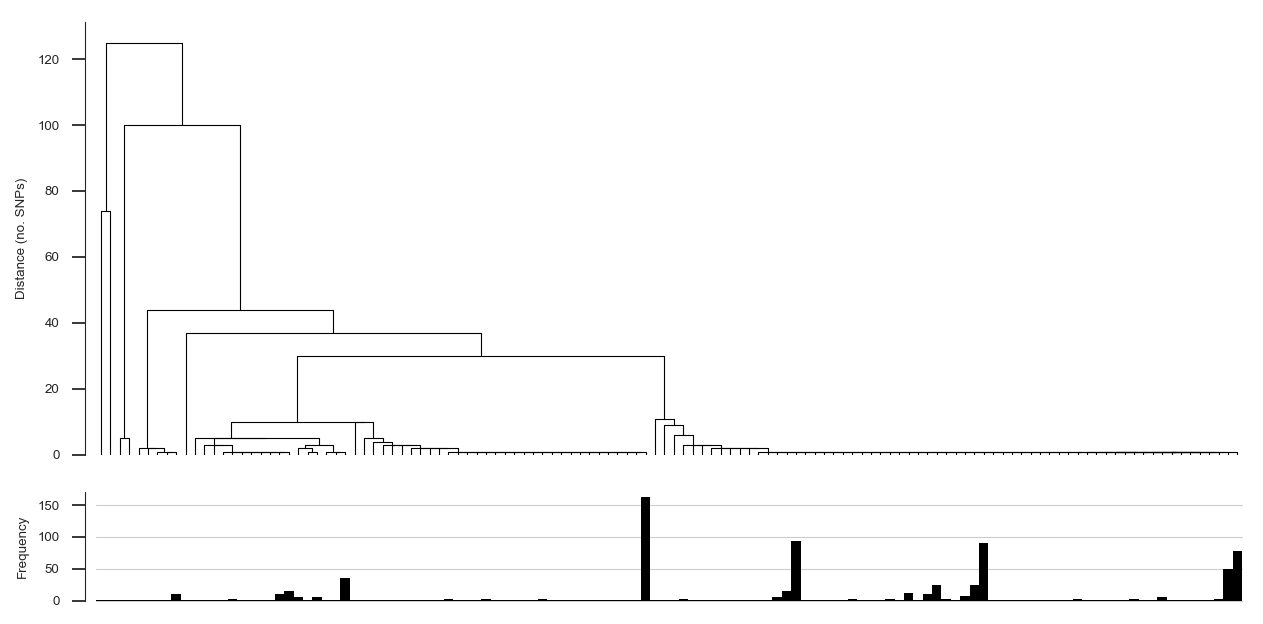

In [27]:
fig = plt.figure(figsize=(8, 4), dpi=160)
fig_haplotypes_distinct_clustered(h_vgsc_995F, fig=fig)

In [46]:
def fig_haplotypes_distinct_clustered_vert(h,
                                           distance_metric='hamming',
                                           linkage_method='single',
                                           color_threshold=0,
                                           truncate_distance=0,
                                           width_ratios=[4, 1],
                                           fig=None, 
                                           cluster_threshold=1,
                                           n_clusters=5,
                                           spans=None):
    
    
    # check inputs
    h = allel.HaplotypeArray(h)

    # compute distance matrix
    dist = scipy.spatial.distance.pdist(h.T, metric=distance_metric)
    if distance_metric in {'hamming', 'jaccard'}:
        # convert distance to number of SNPs, easier to interpret
        dist *= h.n_variants

    # compute hierarchical clustering
    clust = scipy.cluster.hierarchy.linkage(dist, method=linkage_method)
    tree = scipy.cluster.hierarchy.to_tree(clust)
    max_dist = max(clust[:, 2])

    # find level to truncate dendrogram
    lastp = h.n_haplotypes - bisect.bisect_right(clust[:, 2], truncate_distance)

    # setup main figure
    if fig is None:
        fig = plt.figure()
    gs = plt.GridSpec(nrows=1, ncols=2, width_ratios=width_ratios, wspace=0.03)

    # make a dendrogram
    kwargs = dict(
        truncate_mode='lastp', 
        p=lastp,
        show_leaf_counts=False, 
        count_sort=True, 
        no_labels=True, 
        color_threshold=0, 
        above_threshold_color='k', 
        orientation='left'
    )    
    ax = fig.add_subplot(gs[0])
    sns.despine(ax=ax, offset=5, left=True)
    dend = scipy.cluster.hierarchy.dendrogram(clust, ax=ax, **kwargs)
    leaves = dend['leaves']
    ax.set_xlabel('Distance (no. SNPs)')
    ax.set_yticks([])

    # plot frequency bar
    ax = fig.add_subplot(gs[1])
    sns.despine(ax=ax, offset=5, left=True)
    bottom = np.arange(len(leaves))
    width = np.array([
        1 if l < h.n_haplotypes
        else len(get_leaves(get_descendant(tree, l)))
        for l in leaves
    ])
    ax.barh(bottom, width, height=1, lw=0, color='k', align='edge')
    ax.set_ylim(0, len(leaves))
    ax.set_yticks([])
    ax.set_xlabel('Frequency')
    ax.set_xticks([50, 100])
    ax.grid(axis='x', lw=.5, color='#cccccc')
    
    palette = sns.color_palette(n_colors=len(spans))
    for (y1, y2), c in zip(spans, palette):
        ax.axhspan(y1, y2, color=c, linestyle=':', alpha=.3)
#         ax.axhline(y1, linestyle=':')
#         ax.axhline(y2, linestyle=':')
        
    return clust, dend

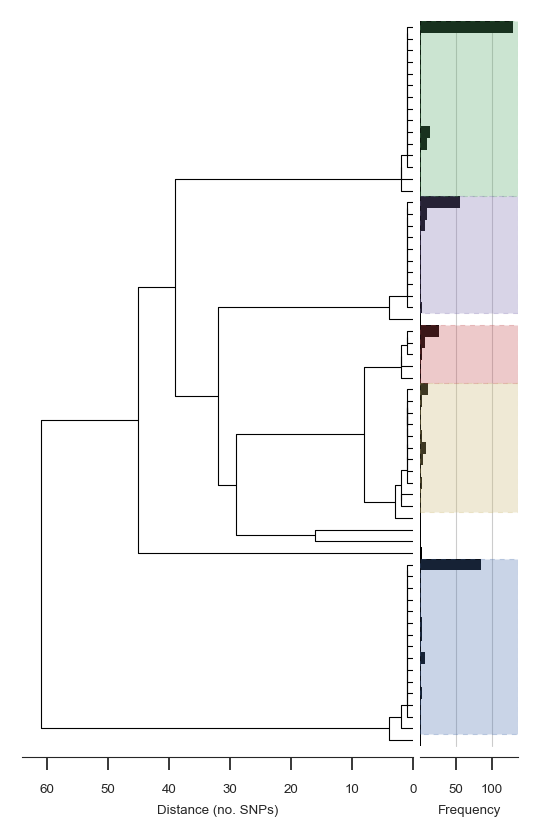

In [47]:

fig = plt.figure(figsize=(4, 6), dpi=160)
clust, dend = fig_haplotypes_distinct_clustered_vert(h_vgsc_995S, fig=fig, spans=[(1, 16), (47, 62), (31, 36), (37, 47), (20, 31)])

In [30]:
cluster_threshold = 2
n_clusters = 5

# find clusters
f = scipy.cluster.hierarchy.fcluster(clust, cluster_threshold, criterion='distance')
f

array([ 1,  1,  4,  1,  1,  1,  4,  1,  4,  4,  4,  1,  4,  4,  4,  1,  1,
        1,  4,  1,  4,  1,  4,  1,  4,  1,  4,  4,  1,  1,  4,  4,  4,  1,
        4,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4,  1,  4,  1,  4,  4,  1,
        1,  4,  4,  4,  1,  4,  1,  4,  1,  4,  1,  4,  1,  1,  1,  4,  4,
        4,  4,  4,  1,  4,  1,  4,  1,  4,  1,  4,  1,  4,  4,  1,  1,  4,
        2,  1,  1,  1,  1,  4,  1,  4,  4,  1,  1,  4,  4,  4,  4,  1,  1,
        4,  1,  4,  4,  4,  1,  4,  1,  4,  1,  4,  4,  1,  1,  4,  4,  4,
        1,  4,  1,  1,  1,  4,  4,  1,  1,  1,  1,  4,  1,  4,  1,  4,  1,
        4,  1,  4,  1,  1,  1,  4,  4,  1,  1,  4,  1,  1,  1,  4,  1,  4,
        4,  4,  4,  4,  1,  1,  1,  4,  4,  4,  1,  1,  1,  4,  1,  4,  1,
        4,  1,  1,  1,  4,  4,  1,  1,  4,  4,  4,  1,  4,  1,  1,  1,  1,
        1,  1,  1,  4,  4,  4,  1,  4,  1,  4,  1,  4,  1,  4,  1,  4,  1,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4

In [31]:
# compute cluster sizes
fsz = np.bincount(f)
fsz

array([  0, 107,   1,   3, 165,  78,   1,  37,  35,   1,   1,   1])

In [32]:
# sort largest first
fsort = np.argsort(fsz)[::-1]
fsort

array([ 4,  1,  5,  7,  8,  3, 11, 10,  9,  6,  2,  0])

In [33]:
# take largest n
fsort_largest = fsort[:n_clusters]

# get haplotype indices for each cluster
clusters = [(np.nonzero(f == i)[0]) for i in fsort_largest]
clusters

[array([  2,   6,   8,   9,  10,  12,  13,  14,  18,  20,  22,  24,  26,
         27,  30,  31,  32,  34,  44,  46,  48,  49,  52,  53,  54,  56,
         58,  60,  62,  66,  67,  68,  69,  70,  72,  74,  76,  78,  80,
         81,  84,  90,  92,  93,  96,  97,  98,  99, 102, 104, 105, 106,
        108, 110, 112, 113, 116, 117, 118, 120, 124, 125, 130, 132, 134,
        136, 138, 142, 143, 146, 150, 152, 153, 154, 155, 156, 160, 161,
        162, 166, 168, 170, 174, 175, 178, 179, 180, 182, 190, 191, 192,
        194, 196, 198, 200, 202, 204, 205, 206, 207, 208, 209, 210, 211,
        212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224,
        225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237,
        238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250,
        251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263,
        264, 265, 266, 267, 268, 269, 270, 271, 272]),
 array([  0,   1,   3,   4,   5,   7,  11,  15,  16,  17,  19,  21,  

In [36]:
tree = scipy.cluster.hierarchy.to_tree(clust)
leaves = dend['leaves']

In [37]:
l2c = []
for l in leaves:
    if l < h_vgsc_995S.n_haplotypes:
        l2c.append(f[l])
    else:
        tips = get_leaves(get_descendant(tree, l))
        l2c.append(f[tips[0]])
l2c

[2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 10,
 11,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [38]:
fsort_largest

array([4, 1, 5, 7, 8])

In [39]:
for x in fsort_largest:
    print(x, l2c.index(x), len(l2c) - l2c[::-1].index(x))

4 47 62
1 1 16
5 37 47
7 31 36
8 20 31


In [82]:
l2c.index(13), len(l2c) - l2c[::-1].index(13)

(22, 31)

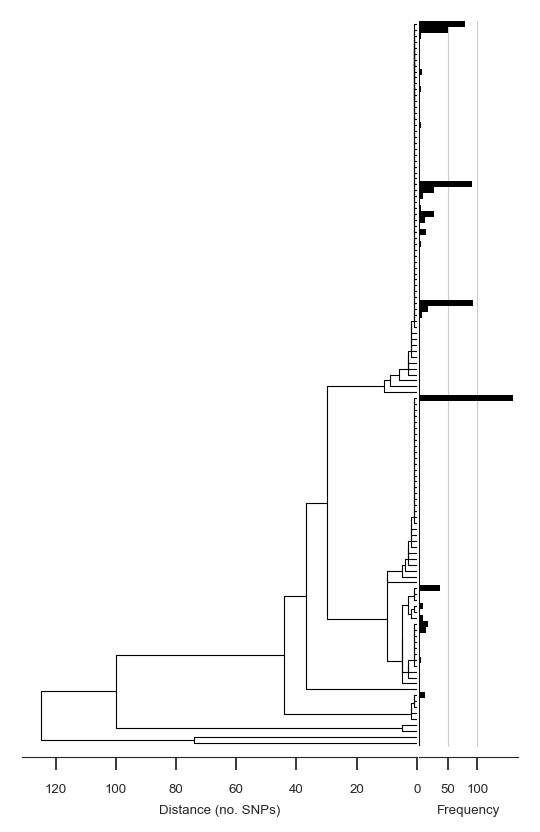

In [30]:
fig = plt.figure(figsize=(4, 6), dpi=160)
fig_haplotypes_distinct_clustered_vert(h_vgsc_995F, fig=fig)

In [31]:
h_vgsc_995F.shape

(1718, 780)

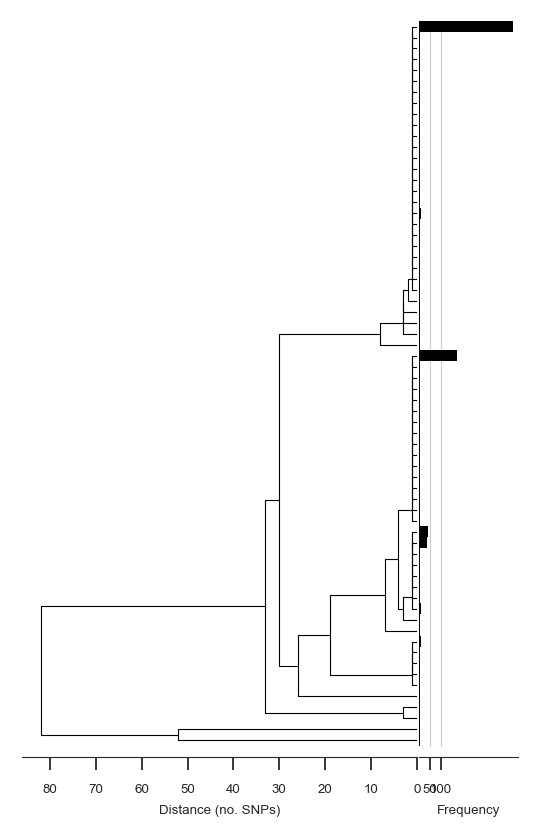

In [32]:
fig = plt.figure(figsize=(4, 6), dpi=160)
fig_haplotypes_distinct_clustered_vert(h_vgsc_995F[:1000], fig=fig)

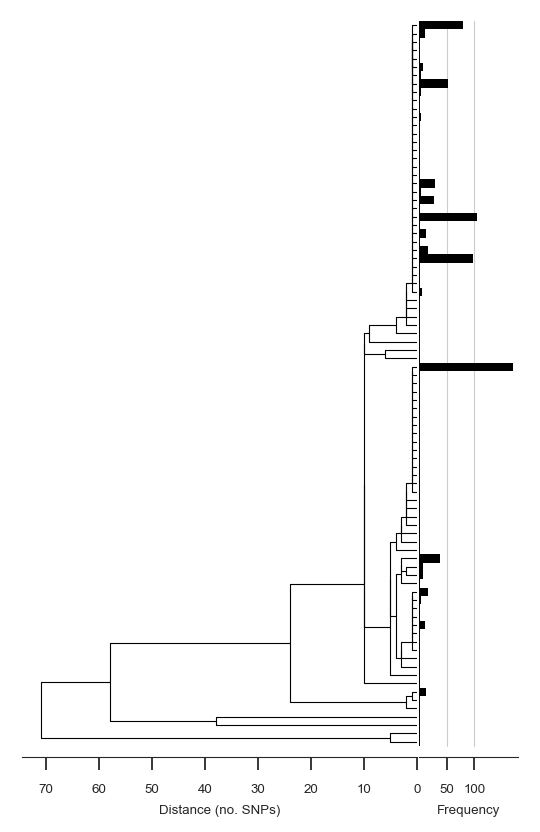

In [33]:
fig = plt.figure(figsize=(4, 6), dpi=160)
fig_haplotypes_distinct_clustered_vert(h_vgsc_995F[-1000:], fig=fig)

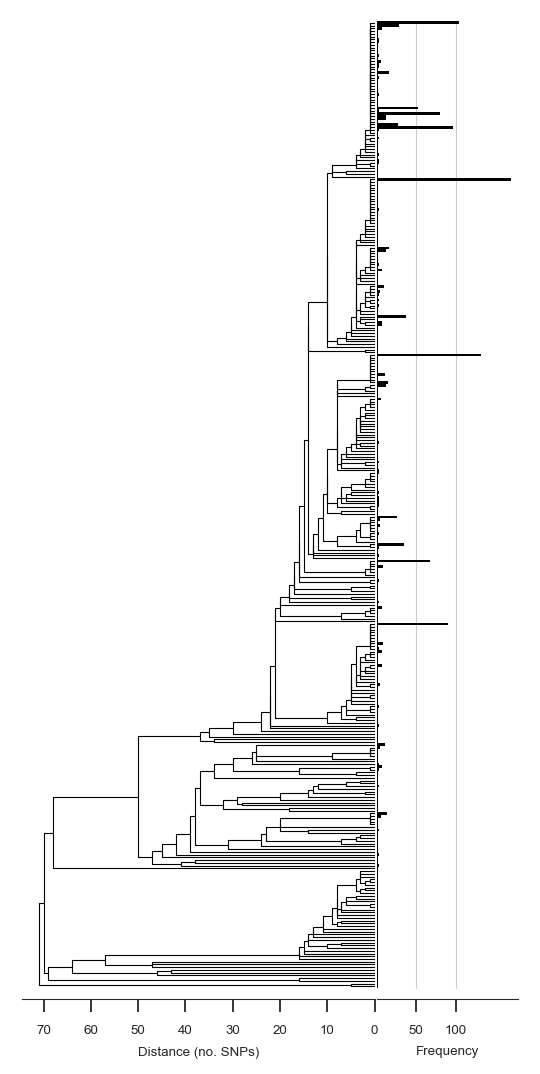

In [36]:
fig = plt.figure(figsize=(4, 8), dpi=160)
fig_haplotypes_distinct_clustered_vert(h_vgsc[-1000:], fig=fig, width_ratios=[5, 2])